<a href="https://colab.research.google.com/github/Suryacant/Rental-Property-Prices-Smart-Predictive-Model/blob/main/Copy_of_ml_for_house_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_excel("/content/House_Rent_Train.xlsx")
df1.head()

,bhk,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [ ]:
df1.shape

(20555, 24)

In [ ]:
df1.columns

Index(['bhk', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [ ]:
df1['bhk'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', nan], dtype=object)

In [ ]:
df1['bhk'] = df1['bhk'].str.extract('(\d+)').astype(float)

In [ ]:
df1['bhk'].value_counts()

2.0    11694
3.0     4400
1.0     4170
4.0      264
Name: bhk, dtype: int64

In [ ]:
df2 = df1.drop(['activation_date', 'latitude', 'longitude', 'floor'],axis='columns')
df2.shape

(20555, 20)

In [ ]:
df1.head()

,bhk,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,2.0,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,2.0,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,3.0,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,1.0,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,3.0,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [ ]:
df2.isnull().sum()

bhk               27
locality         160
lease_type        23
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age      23
bathroom          23
facing            23
cup_board         23
total_floor       23
amenities         23
water_supply      23
building_type     23
balconies         23
rent              23
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

bhk              0
locality         0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
total_floor      0
amenities        0
water_supply     0
building_type    0
balconies        0
rent             0
dtype: int64

In [ ]:
df3.shape

(20377, 20)

In [ ]:
values_to_drop = ['bhk2', 'bhk3', '1BHK1','BHK4PLUS']
df4 = df3[~df3['bhk'].isin(values_to_drop)]

In [ ]:
df4['bhk'].unique()

array([2., 3., 1., 4.])

In [ ]:
df4['bhk'].value_counts()

2.0    11607
3.0     4368
1.0     4140
4.0      262
Name: bhk, dtype: int64

In [ ]:
df4['balconies'].unique()

array([ 2.,  3.,  0.,  1.,  4.,  5., 13.,  6., 10.])

In [ ]:
df4['balconies'].value_counts()

1.0     7957
0.0     5868
2.0     4634
3.0     1582
4.0      288
5.0       40
6.0        4
10.0       3
13.0       1
Name: balconies, dtype: int64

In [ ]:
values_to_keep = [1, 2, 3, 4]
df5 = df4[df4['balconies'].isin(values_to_keep)]

In [ ]:
df5['balconies'].unique()

array([2., 3., 1., 4.])

In [ ]:
df5['cup_board'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  0.,  6., 10.,  7.,  8.,  9., 15., 12.,
       11., 20., 13., 16., 40.])

In [ ]:
df5['cup_board'].value_counts()

2.0     5888
3.0     3204
1.0     2067
4.0     1135
0.0     1067
5.0      402
6.0      386
8.0      103
7.0       72
10.0      67
9.0       34
12.0      17
15.0       6
11.0       5
20.0       4
16.0       2
13.0       1
40.0       1
Name: cup_board, dtype: int64

In [ ]:
df6 = df5[df5['cup_board'] <= 7]


In [ ]:
df6['cup_board'].value_counts()

2.0    5888
3.0    3204
1.0    2067
4.0    1135
0.0    1067
5.0     402
6.0     386
7.0      72
Name: cup_board, dtype: int64

In [ ]:
df6['bathroom'].value_counts()

2.0    8470
1.0    3254
3.0    2238
4.0     227
5.0      29
6.0       3
Name: bathroom, dtype: int64

In [ ]:
df7 = df6[df6['bathroom'] <= 5]


In [ ]:
df7['bathroom'].value_counts()

2.0    8470
1.0    3254
3.0    2238
4.0     227
5.0      29
Name: bathroom, dtype: int64

In [ ]:
df7['property_age'].value_counts()

 0.0     2465
 5.0     1870
 10.0    1783
 1.0     1608
 3.0     1393
 2.0     1000
 4.0      729
 8.0      709
 7.0      605
 6.0      464
 15.0     427
 9.0      246
 12.0     239
 20.0     200
 11.0      74
 13.0      65
 25.0      59
 14.0      58
 30.0      49
 18.0      39
 16.0      30
 17.0      29
-1.0       24
 40.0       9
 50.0       8
 22.0       6
 19.0       6
 23.0       5
 21.0       4
 27.0       3
 45.0       3
 35.0       3
 34.0       3
 24.0       2
 28.0       1
Name: property_age, dtype: int64

In [ ]:
df8 = df7[df7['property_age'] > -1]

In [ ]:
counts = df8['property_age'].value_counts()
to_keep = counts[counts > 9].index
df9 = df8[df8['property_age'].isin(to_keep)]

In [ ]:
df9['property_age'].value_counts()


0.0     2465
5.0     1870
10.0    1783
1.0     1608
3.0     1393
2.0     1000
4.0      729
8.0      709
7.0      605
6.0      464
15.0     427
9.0      246
12.0     239
20.0     200
11.0      74
13.0      65
25.0      59
14.0      58
30.0      49
18.0      39
16.0      30
17.0      29
Name: property_age, dtype: int64

In [ ]:
df9.shape

(14141, 20)

In [ ]:
len(df9.locality.unique())

1523

In [ ]:
df9.location = df9.locality.apply(lambda x: x.strip())
location_stats = df9['locality'].value_counts(ascending=False)
location_stats

<ipython-input-1010-099150846b61>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df9.location = df9.locality.apply(lambda x: x.strip())


Whitefield                                                                          766
HSR Layout                                                                          420
Bellandur                                                                           380
Banashankari                                                                        355
Marathahalli                                                                        346
                                                                                   ... 
ITPL Gate 3, Whitefield, Bengaluru, Karnataka, India                                  1
HSR layout sector 6                                                                   1
GNS Residency, Bhagat Singh Main Road, Bommanahalli, Bengaluru, Karnataka, India      1
KHB Colony                                                                            1
Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield                     1
Name: locality, Length: 1523, dt

In [ ]:
location_stats.values.sum()


14141

In [ ]:
len(location_stats[location_stats>10])


180

In [ ]:
len(location_stats)

1523

In [ ]:
len(location_stats[location_stats<=10])

1343

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

HSR Layout, Bengaluru, Karnataka, India                                             10
Mullur                                                                              10
Prithvi Layout,Whitefield                                                           10
Channasandra,Srinivaspura                                                           10
Dooravani Nagar                                                                     10
                                                                                    ..
ITPL Gate 3, Whitefield, Bengaluru, Karnataka, India                                 1
HSR layout sector 6                                                                  1
GNS Residency, Bhagat Singh Main Road, Bommanahalli, Bengaluru, Karnataka, India     1
KHB Colony                                                                           1
Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield                    1
Name: locality, Length: 1343, dtype: int64

In [ ]:
df10 = df9.copy()

In [ ]:
df10.locality = df10.locality.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df10.locality.unique())

181

In [ ]:
df_filtered = df10.loc[df9['locality'] == 'other']


In [ ]:
df10.shape


(14141, 20)

In [ ]:
df10.head(10)

,bhk,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,total_floor,amenities,water_supply,building_type,balconies,rent
1,2.0,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,3.0,other,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
4,3.0,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
5,1.0,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
6,3.0,"Narayanappa Garden,Whitefield",ANYONE,1,1,1,1,FULLY_FURNISHED,BOTH,1895,5.0,3.0,NE,5.0,9.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":t...",CORPORATION,AP,3.0,32000.0
9,2.0,Whitefield,ANYONE,1,1,0,1,SEMI_FURNISHED,BOTH,1290,4.0,2.0,E,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,19500.0
10,2.0,RR Nagar,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1200,2.0,2.0,E,4.0,2.0,"{""AC"":false,""CLUB"":false,""CPA"":false,""FS"":fals...",CORPORATION,IF,1.0,12500.0
11,2.0,other,ANYONE,1,1,0,1,FULLY_FURNISHED,FOUR_WHEELER,1300,8.0,2.0,N,2.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORPORATION,AP,2.0,32000.0
12,2.0,Raja Rajeshwari Nagar,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,930,7.0,2.0,E,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORPORATION,AP,1.0,11000.0
13,2.0,other,FAMILY,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1418,4.0,2.0,E,2.0,14.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,32500.0


In [ ]:
df10.rent.describe()

count    14141.000000
mean     20554.674139
std       8489.859981
min       8000.000000
25%      14000.000000
50%      20000.000000
75%      25000.000000
max      50000.000000
Name: rent, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locality'):
        m = np.mean(subdf.rent)
        st = np.std(subdf.rent)
        reduced_df = subdf[(subdf.rent>(m-st)) & (subdf.rent<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    df11 = df10.copy()

df11 = remove_pps_outliers(df10)

df11.shape

(9934, 20)

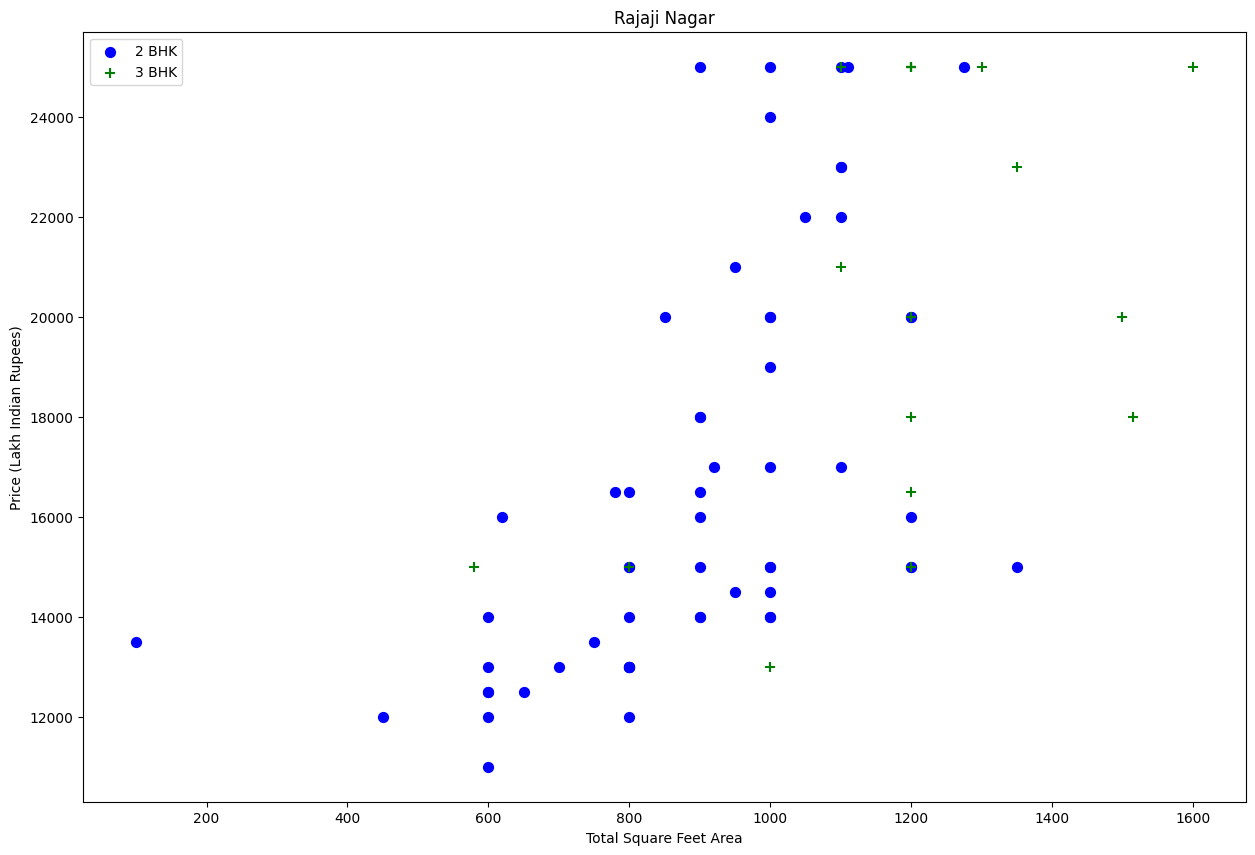

In [ ]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bhk==2)]
    bhk3 = df[(df.locality==locality) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.property_size,bhk2.rent,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.property_size,bhk3.rent,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()

plot_scatter_chart(df11,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.rent),
                'std': np.std(bhk_df.rent),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.rent<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df12 = remove_bhk_outliers(df11)
df12.shape

(8926, 20)

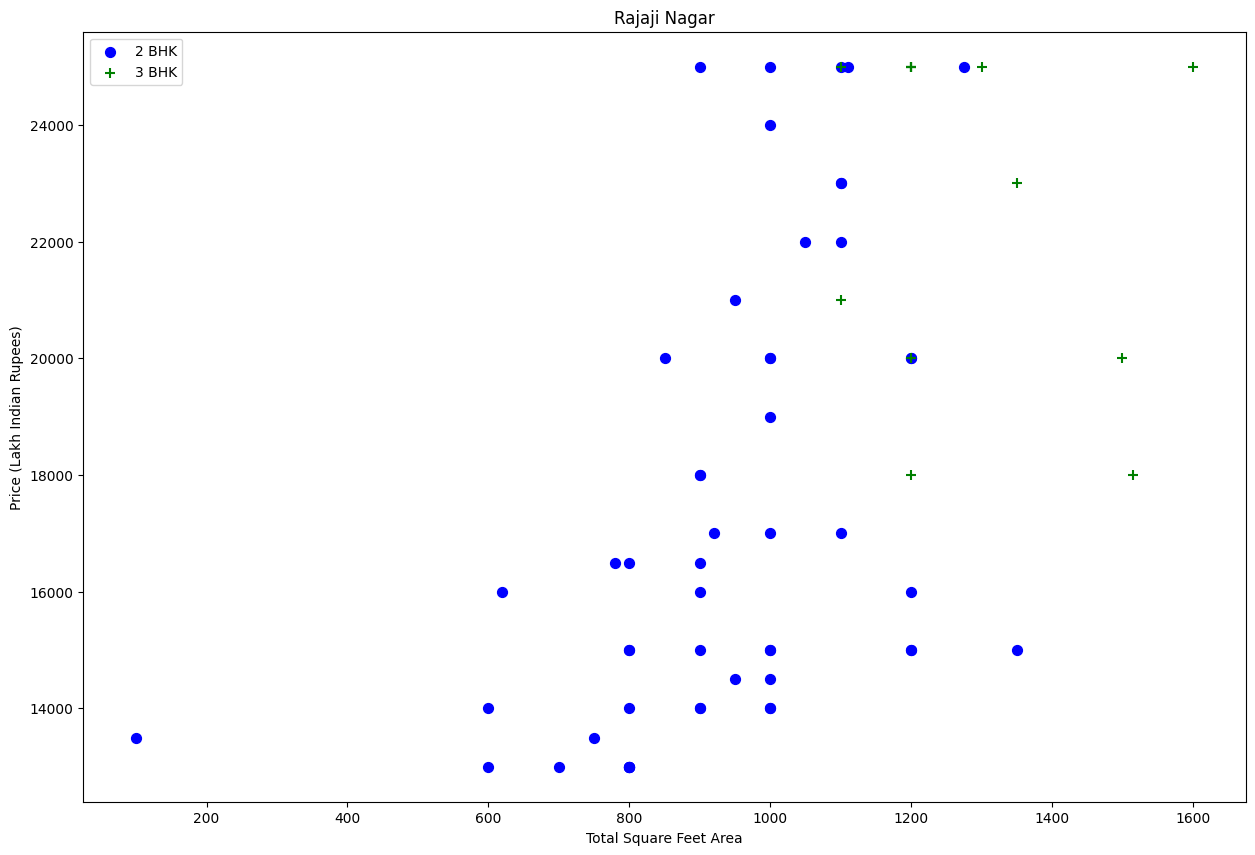

In [ ]:
plot_scatter_chart(df12,"Rajaji Nagar")

Text(0, 0.5, 'Count')

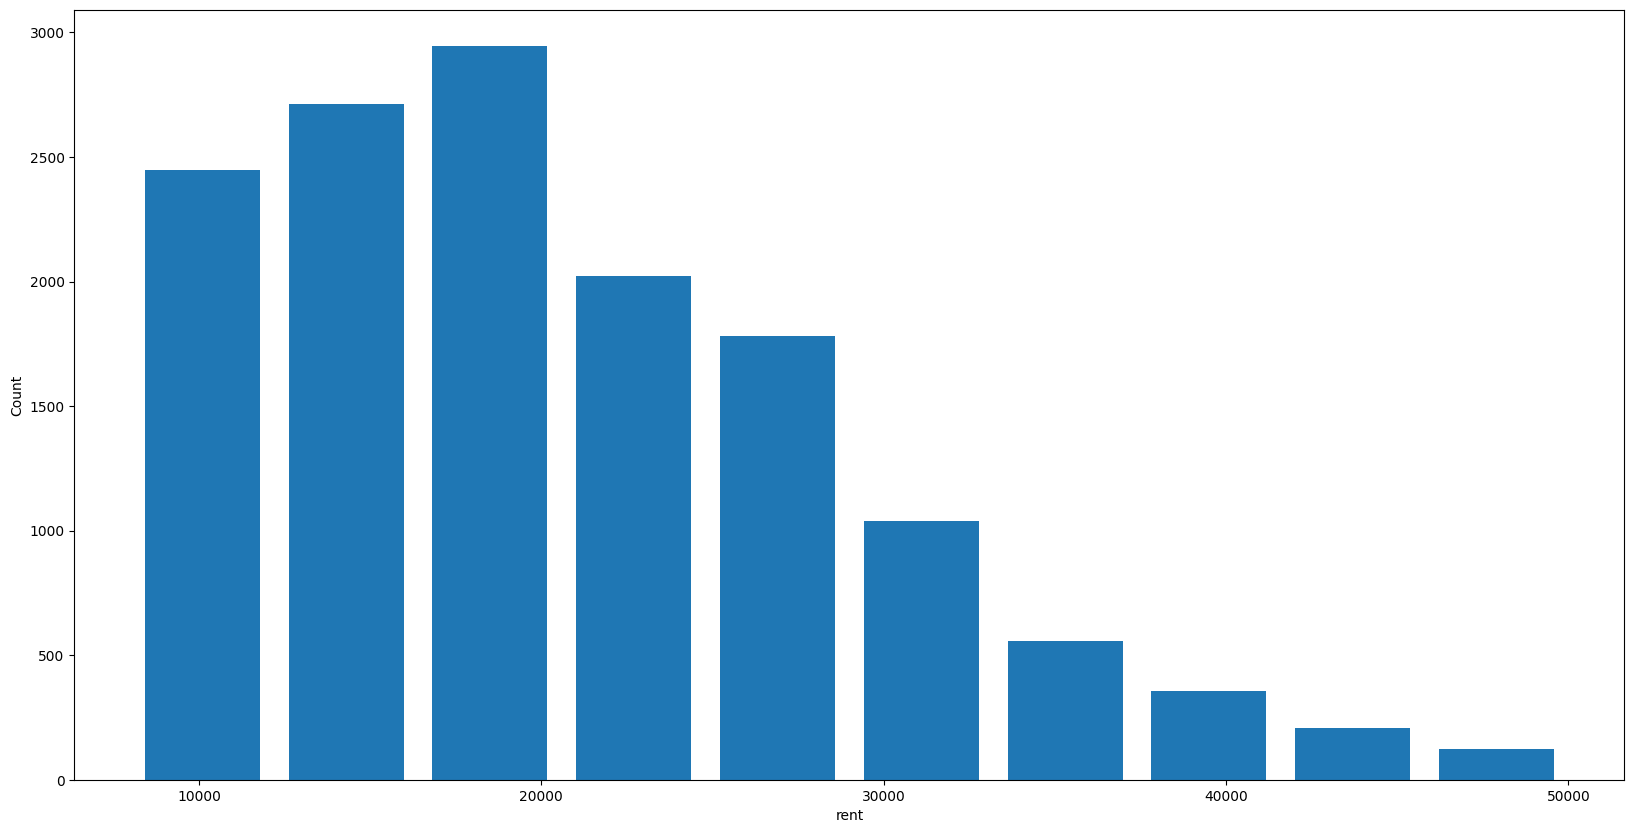

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.rent,rwidth=0.8)
plt.xlabel("rent")
plt.ylabel("Count")


In [ ]:
df11.bathroom.unique()

array([2., 3., 1., 4., 5.])

Text(0, 0.5, 'Count')

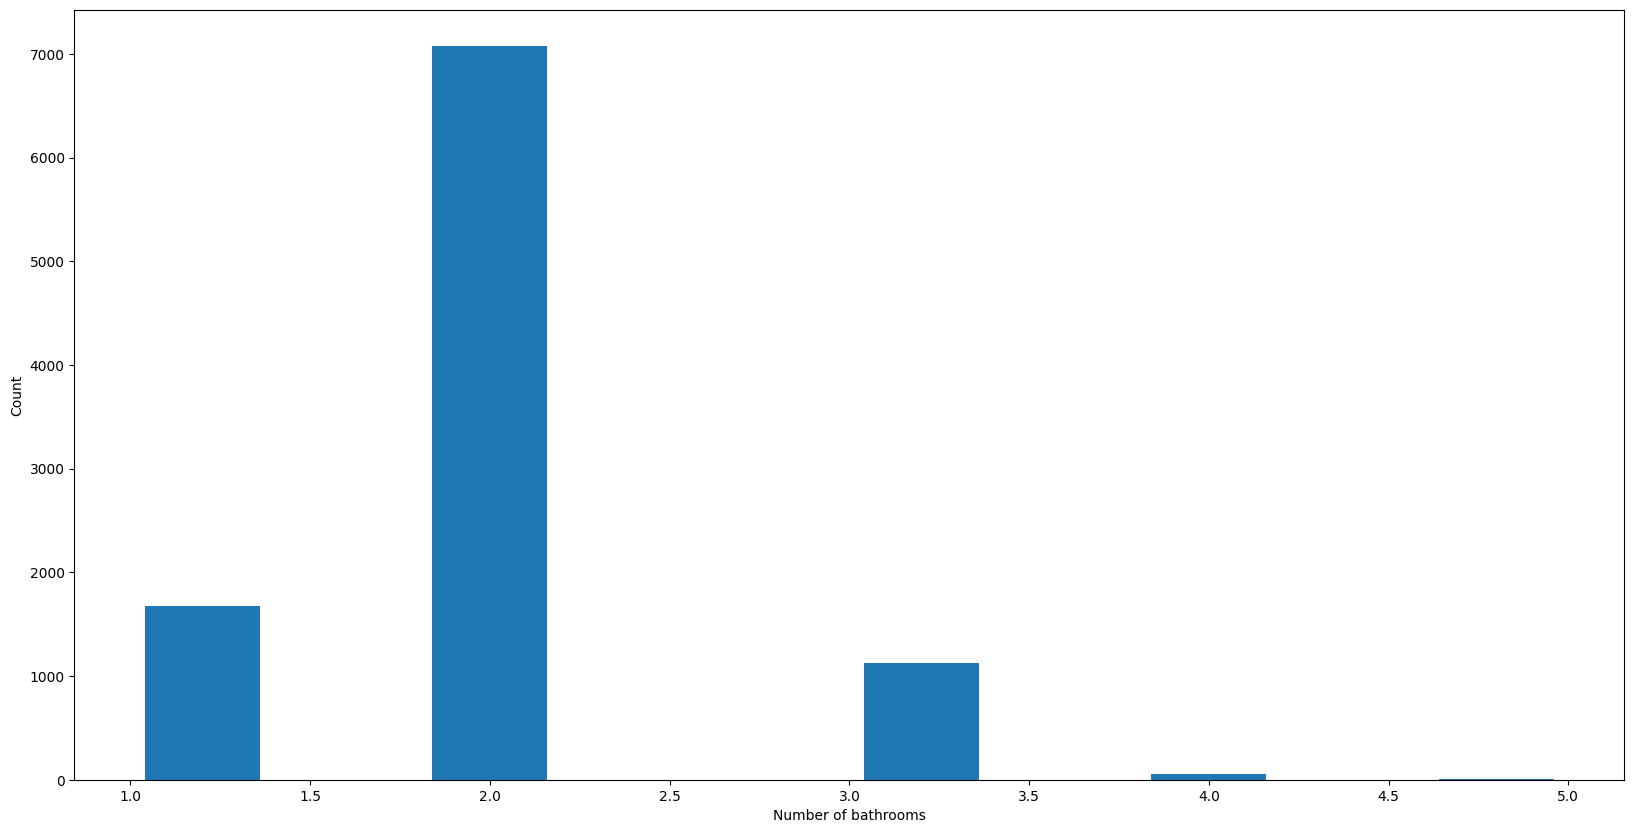

In [ ]:
plt.hist(df11.bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
dummies = pd.get_dummies(df11.locality)
dummies.head(3)

,"1st Sector,HSR Layout",AECS Layout,"Adarsh Palm Retreat,Bellandur",Adugodi,"Ambedkar Nagar,Whitefield",Annapurneshwari Nagar,Ashok Nagar,Attiguppe,B Narayanapura,BTM 2nd Stage,...,Vijaya Nagar,Vijayanagar,Vimanapura,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,bhk,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur
0,2.0,"1st Sector,HSR Layout",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,977,...,0,0,0,0,0,0,0,0,0,0
1,3.0,"1st Sector,HSR Layout",ANYONE,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1216,...,0,0,0,0,0,0,0,0,0,0
2,2.0,"1st Sector,HSR Layout",ANYONE,1,1,1,1,SEMI_FURNISHED,FOUR_WHEELER,1250,...,0,0,0,0,0,0,0,0,0,0
3,3.0,"1st Sector,HSR Layout",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1255,...,0,0,0,0,0,0,0,0,0,0
4,2.0,"1st Sector,HSR Layout",FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,977,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop([ 'locality','lease_type','furnishing', 'parking','facing', 'amenities','water_supply', 'building_type' ], axis='columns')
df12.head(2)

,bhk,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,total_floor,...,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur
0,2.0,1,1,1,1,977,2.0,2.0,2.0,19.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1,1,1,0,1216,3.0,3.0,3.0,17.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(9934, 192)

In [ ]:
X = df12.drop(['rent'],axis='columns')
X.head(3)

,bhk,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,total_floor,...,Vignan Nagar,Vijaya Nagar,Vijayanagar,Vimanapura,Viveka Nagar,Whitefield,Whitefield Hope Farm Junction,"Whitefield, Bengaluru, Karnataka, India",Wilson Garden,Yemalur
0,2.0,1,1,1,1,977,2.0,2.0,2.0,19.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1,1,1,0,1216,3.0,3.0,3.0,17.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1,1,1,1,1250,3.0,2.0,2.0,19.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(9934, 191)

In [ ]:
y = df12.rent
y.head(3)

0    24000.0
1    28500.0
2    25000.0
Name: rent, dtype: float64

In [ ]:
len(y)

9934

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6749502981719433

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67658415, 0.69853743, 0.67913657, 0.70280691, 0.68905893])

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [-1, 1, 2, 3]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.689225,"{'fit_intercept': True, 'n_jobs': -1}"
1,lasso,0.688112,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.376475,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
def predict_price(locality,property_size,bathroom,bhk):
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = property_size
    x[1] = bathroom
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('Bellandur',1400, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1863992.5729090255

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))